<a href="https://colab.research.google.com/github/sergio-cabrales/python/blob/main/OnBalanceVolume.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Description: This program uses On-Balance Volume (OBV) to dertermine when to buy and sell stock
#Import the libraries
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo',start='2020-01-01', end='2021-03-07')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385
...,...,...,...,...,...,...
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998


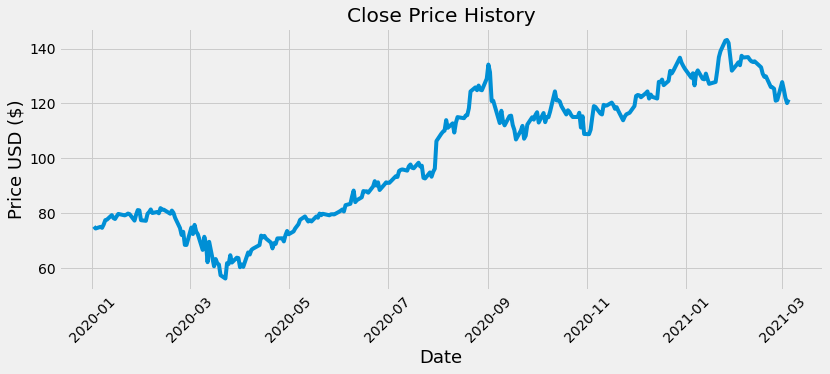

In [4]:
# Visually Show The Stock Price(s)
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title('Close Price History')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [5]:
#Calculate the On Balance Volume
OBV = []
OBV.append(0)
for i in range(1, len(df.Close)):
    if df.Close[i] > df.Close[i-1]: #If the closing price is above the prior close price 
          OBV.append(OBV[-1] + df.Volume[i]) #then: Current OBV = Previous OBV + Current Volume
    elif df.Close[i] < df.Close[i-1]:
          OBV.append( OBV[-1] - df.Volume[i])
    else:
          OBV.append(OBV[-1])

In [6]:
#Store the OBV and OBV EMA into new columns
df['OBV'] = OBV
df['OBV_EMA'] = df['OBV'].ewm(com=20).mean()
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA
Date,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,0.0,0.000000e+00
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-146322800.0,-7.494582e+07
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,-27935600.0,-5.850529e+07
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-136807600.0,-7.953594e+07
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,-4728400.0,-6.308008e+07
...,...,...,...,...,...,...,...,...
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001,775917200.0,1.085284e+09
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003,673901900.0,1.065694e+09
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998,561471500.0,1.041684e+09


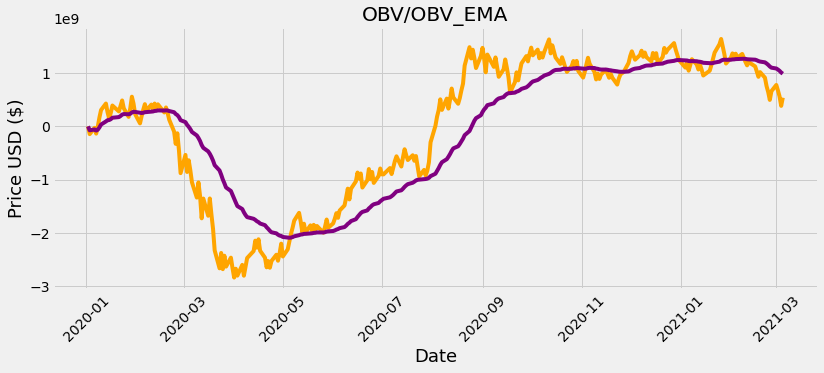

In [7]:
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
#plt.plot( df['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.plot( df['OBV'],  label='OBV', color= 'orange')
plt.plot( df['OBV_EMA'],  label='OBV_EMA', color= 'purple')
plt.xticks(rotation=45) 
plt.title('OBV/OBV_EMA')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [8]:
#Create a function to signal when to buy and sell an asset
#If OBV > OBV_EMA Then Buy
#If OBV < OBV_EMA Then Sell
#Else Do nothing
def buy_sell(signal, col1, col2):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1 #A flag for the trend upward/downward
  #Loop through the length of the data set
  for i in range(0,len(signal)):
    #if OBV > OBV_EMA  and flag != 1 then buy else sell
      if signal[col1][i] > signal[col2][i] and flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
      #else  if OBV < OBV_EMA  and flag != 0 then sell else buy
      elif signal[col1][i] < signal[col2][i] and flag != 0:    
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
      #else   OBV == OBV_EMA  so append NaN 
      else: 
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [9]:
#Create buy and sell columns
x = buy_sell(df, 'OBV','OBV_EMA' )
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data frame
df

,High,Low,Open,Close,Volume,Adj Close,OBV,OBV_EMA,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,74.333511,0.0,0.000000e+00,NaN,NaN
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.610840,-146322800.0,-7.494582e+07,NaN,74.357498
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,74.197395,-27935600.0,-5.850529e+07,74.949997,NaN
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.848442,-136807600.0,-7.953594e+07,NaN,74.597504
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,75.036385,-4728400.0,-6.308008e+07,75.797501,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,127.930000,122.790001,123.750000,127.790001,115998300.0,127.790001,775917200.0,1.085284e+09,NaN,NaN
2021-03-02,128.720001,125.010002,128.410004,125.120003,102015300.0,125.120003,673901900.0,1.065694e+09,NaN,NaN
2021-03-03,125.709999,121.839996,124.809998,122.059998,112430400.0,122.059998,561471500.0,1.041684e+09,NaN,NaN


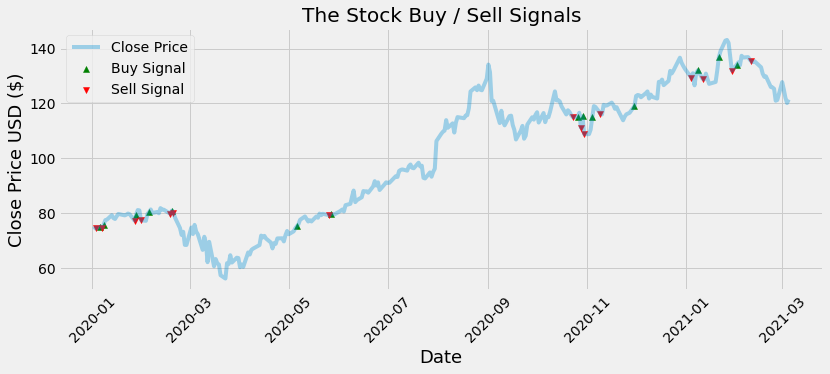

In [10]:
# Visually Show The Stock buy and sell signals
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(df.index, df['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(df.index, df['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( df['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title('The Stock Buy / Sell Signals')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()